# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#city_df=pd.DataFrame({"City":cities})
#city_df.head()

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key


city_list=[]
city_name=[]
country=[]
lng=[]
lat=[]
temp=[]
humid=[]
clouds=[]
wind=[]
date=[]


for city in cities:
    query_url=f"{url}&q={city}"
    response_json=requests.get(query_url).json()
 
    try:
        city_id=response_json['id']
        city_list.append(city_id)
        cityname=response_json['name']
        city_name.append(cityname)
        countryname = response_json['sys']['country']
        country.append(countryname)
        lng_list = response_json['coord']['lon']
        lng.append(lng_list)
        lat_list = response_json['coord']['lat']
        lat.append(lat_list)
        temps = response_json['main']['temp']
        temp.append(temps)
        humidity = response_json['main']['humidity']
        humid.append(humidity)
        clouds_list = response_json['clouds']['all']
        clouds.append(clouds_list)
        wind_speed = response_json['wind']['speed']
        wind.append(wind_speed)
        date_info=response_json['dt']
        date.append(date_info)

        print(f"City Name: {city}, City ID: {city_id}")
    except:
        print("Missing field/skipping")


 carnarvon, City ID: 2074865
City Name: chiang klang, City ID: 1611195
City Name: qaanaaq, City ID: 3831208
City Name: luena, City ID: 3347719
City Name: tanout, City ID: 2439155
City Name: kahului, City ID: 5847411
City Name: tsiroanomandidy, City ID: 1054463
City Name: yar-sale, City ID: 1486321
City Name: ahipara, City ID: 2194098
City Name: tari, City ID: 2322495
City Name: kodiak, City ID: 5866583
City Name: shieli, City ID: 1524801
City Name: bilma, City ID: 2446796
City Name: broken hill, City ID: 2173911
City Name: hithadhoo, City ID: 1282256
City Name: rudbar, City ID: 1128239
City Name: gobabis, City ID: 3357247
City Name: fatsa, City ID: 747155
Missing field/skipping
City Name: kruisfontein, City ID: 986717
City Name: petropavlovsk-kamchatskiy, City ID: 2122104
City Name: isangel, City ID: 2136825
City Name: poum, City ID: 2138555
City Name: agropoli, City ID: 6541176
City Name: cidreira, City ID: 3466165
City Name: longyearbyen, City ID: 2729907
City Name: kardla, City ID: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df=pd.DataFrame({"City":city_name,"Lat":lat,"Lng":lng, "Max Temp":temp,"Humidity":humid,"Clouds":clouds,"Wind Speed":wind,"Country":country, "Date":date})
cities_df.head()
cities_df.to_csv(r'cities_updated.csv', index=False,header=True)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid_max=cities_df["Humidity"].max()
print(humid_max)

100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

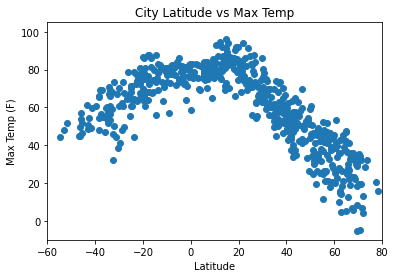

In [39]:
x_values=cities_df["Lat"]
y_values=cities_df["Max Temp"]

plt.scatter(x_values,y_values)
plt.title("City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(-10, 105)
plt.xlim(-60,80)
plt.savefig("Latitude vs Temp Plot.png")
plt.show()

In [8]:
#Scatter plot is looking at relationship between latitude and #temperature. The equator is at 0 latitude, so as you approach it the #temperature increases.

## Latitude vs. Humidity Plot

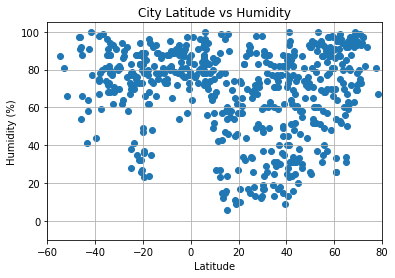

In [50]:
x_values=cities_df["Lat"]
y_values=cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-10, 105)
plt.xlim(-60,80)
plt.grid(True)
plt.savefig("Latitude vs Humidity Plot.png")
plt.show()

In [10]:
# The scatter plot is looking at the relationship between latitude and #humidity. There doesn't seem to be a clear coorelation between the two.

## Latitude vs. Cloudiness Plot

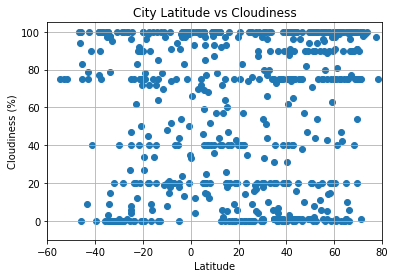

In [49]:
x_values=cities_df["Lat"]
y_values=cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10, 105)
plt.xlim(-60,80)
plt.grid(True)
plt.savefig("Latitude vs Cloudiness Plot.png")
plt.show()

In [12]:
# The scatter plot is looking at the relationship between latitude and #cloudiness. There doesn't seem to be a clear coorelation between the two.

## Latitude vs. Wind Speed Plot

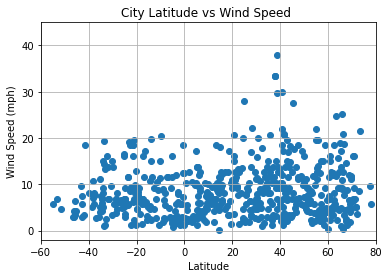

In [48]:
x_values=cities_df["Lat"]
y_values=cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title("City Latitude vs Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 45)
plt.xlim(-60,80)
plt.grid(True)
plt.savefig("Latitude vs Wind Speed Plot.png")
plt.show()

In [14]:
# The scatter plot is looking at the relationship between latitude and #wind speed. There doesn't seem to be a clear coorelation between the two.

## Linear Regression

In [15]:
northern_hemi=cities_df.loc[cities_df['Lat']>=0]
southern_hemi=cities_df.loc[cities_df['Lat']<0]




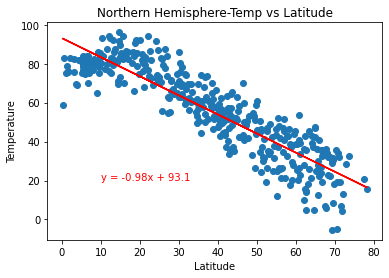

In [47]:
xaxis=northern_hemi['Lat']
yaxis=northern_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =st.pearsonr(xaxis, yaxis)

plt.scatter(xaxis,yaxis)
plt.title('Northern Hemisphere-Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Temperature")
plt.annotate(line_eq,(10,20), fontsize=10, color='red')
plt.plot(xaxis,regress_values,"r-")
plt.savefig("Northern Hemisphere-Temp vs Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

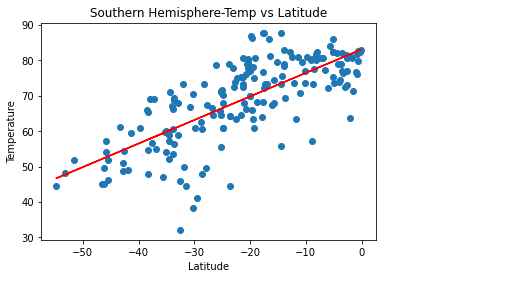

In [46]:
xaxis=southern_hemi['Lat']
yaxis=southern_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =st.pearsonr(xaxis, yaxis)

plt.scatter(xaxis,yaxis)
plt.title('Southern Hemisphere-Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Temperature")
plt.annotate(line_eq,(10,20), fontsize=10, color='red')
plt.plot(xaxis,regress_values,"r-")
plt.savefig("Southern Hemisphere-Temp vs Latitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

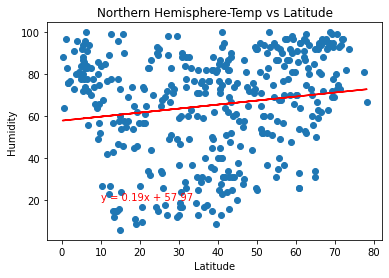

In [45]:
xaxis=northern_hemi['Lat']
yaxis=northern_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =st.pearsonr(xaxis, yaxis)

plt.scatter(xaxis,yaxis)
plt.title('Northern Hemisphere-Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.annotate(line_eq,(10,20), fontsize=10, color='red')
plt.plot(xaxis,regress_values,"r-")
plt.savefig("Northern Hemisphere-Humidity vs Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

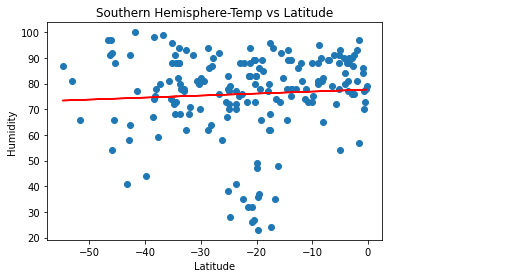

In [44]:
xaxis=southern_hemi['Lat']
yaxis=southern_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =st.pearsonr(xaxis, yaxis)

plt.scatter(xaxis,yaxis)
plt.title('Southern Hemisphere-Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.annotate(line_eq,(10,20), fontsize=10, color='red')
plt.plot(xaxis,regress_values,"r-")
plt.savefig("Southern Hemisphere-Humidity vs Latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

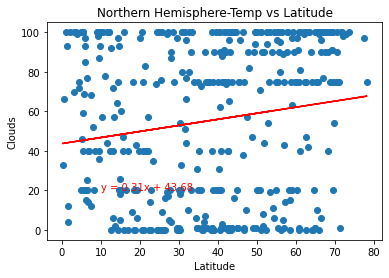

In [43]:
xaxis=northern_hemi['Lat']
yaxis=northern_hemi['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =st.pearsonr(xaxis, yaxis)

plt.scatter(xaxis,yaxis)
plt.title('Northern Hemisphere-Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Clouds")
plt.annotate(line_eq,(10,20), fontsize=10, color='red')
plt.plot(xaxis,regress_values,"r-")
plt.savefig("Northern Hemisphere-Clouds vs Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

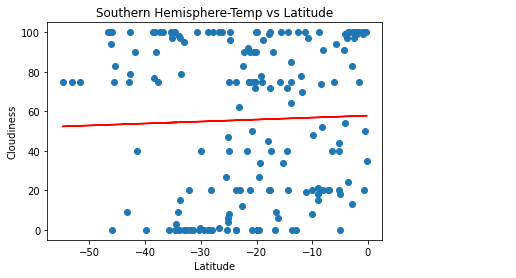

In [42]:
xaxis=southern_hemi['Lat']
yaxis=southern_hemi['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =st.pearsonr(xaxis, yaxis)

plt.scatter(xaxis,yaxis)
plt.title('Southern Hemisphere-Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(10,20), fontsize=10, color='red')
plt.plot(xaxis,regress_values,"r-")
plt.savefig("Southern Hemisphere-Cloudiness vs Latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

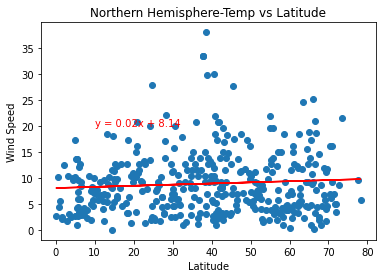

In [41]:
xaxis=northern_hemi['Lat']
yaxis=northern_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =st.pearsonr(xaxis, yaxis)

plt.scatter(xaxis,yaxis)
plt.title('Northern Hemisphere-Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,20), fontsize=10, color='red')
plt.plot(xaxis,regress_values,"r-")
plt.savefig("Northern Hemisphere-Wind Speed vs Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

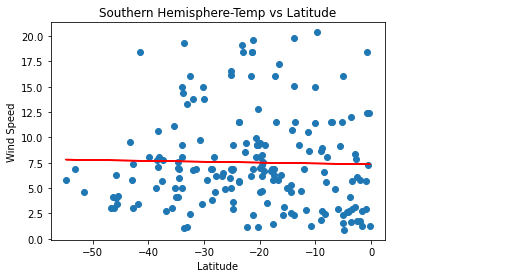

In [40]:
xaxis=southern_hemi['Lat']
yaxis=southern_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =st.pearsonr(xaxis, yaxis)

plt.scatter(xaxis,yaxis)
plt.title('Southern Hemisphere-Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,20), fontsize=10, color='red')
plt.plot(xaxis,regress_values,"r-")
plt.savefig("Southern Hemisphere-Wind Speed vs Latitude")
plt.show()